1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

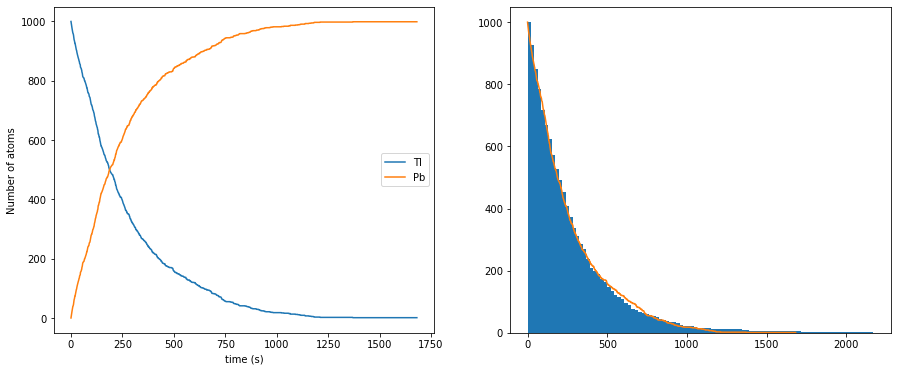

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#extract N_Tl samples every second accordingly to the prob distr

Tau = 3.052 * 60 #seconds
max_iterations = 100000

def p(t):
    return 1 - 2**(-t/Tau)

N_Tl = np.array([1000,])
N_Pb = np.array([0,])

# for t in range(1, max_iterations):
#     N_samples = np.random.random(N_Tl[t-1])
#     new_N_Tl = N_Tl[t-1] - N_samples[ N_samples < p(t) ].size
    
#     if new_N_Tl == 0:
#         break
        
#     N_Tl = np.append(N_Tl, new_N_Tl)
#     N_Pb = np.append(N_Pb, 1000 - new_N_Tl)
    
N_samples = np.random.random(1000)
for t in range(1, max_iterations):
    new_N_Tl = 1000 - N_samples[ N_samples < p(t) ].size
    
    if new_N_Tl <= 0:
        break
        
    N_Tl = np.append(N_Tl, new_N_Tl)
    N_Pb = np.append(N_Pb, 1000 - new_N_Tl)
    
tMax = t

t = np.arange(tMax)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax[0].plot(t, N_Tl, label='Tl')
ax[0].plot(t, N_Pb, label='Pb')
ax[0].legend()
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("Number of atoms")

# 2nd part
def distr_pdf(t):
    return 2**(-t/Tau) * (np.log(2) / Tau)

def distr_icdf(z):
    return -Tau * np.log2(1-z)

u = np.random.random(1000)
v = distr_icdf(u)
# n, bins = np.histogram(v, bins=100)
# N_atoms = 1000 - np.cumsum(n)
# time = np.arange(0,100,1)
# ax[1].plot(time, N_atoms)
ax[1].hist(v, cumulative=-1, bins=100)
ax[1].plot(t, N_Tl, label='Tl')
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [3]:
Z=79
particles=10**(6)
e_charge=1.602176565*10**(-19)
E=7.7*10**(6)*e_charge
a0=5.2917721067*10**(-11)
e0=8.8541878176*10**(-12)

x, y = np.random.multivariate_normal([0,0], [[(a0/100)**2,0],[0,(a0/100)**2]], size=particles).T

b = (x**2 + y**2)**0.5
cost=(Z*e_charge**2)/(2*np.pi*e0*E)
theta=2*np.arctan(cost/b)

bb_part = theta[ theta>np.pi*0.5 ].size / particles

print("the fraction of particles that bounce back are", bb_part*100, "%")

the fraction of particles that bounce back are 0.15560000000000002 %


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [24]:
import scipy.integrate as integrate

def f(x):
    return np.sin(1 / x*(2 - x))**2

def k_fun(x, y):
    if y<f(x):
        return 1
    else:
        return 0

# Monte Carlo integration
N=100000
ci = np.array([])

for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x):
        ci = np.append(ci,1)
    else:
        ci = np.append(ci,0)

count_mean = np.mean(ci)
count_var = np.var(ci)

I = 2 * count_mean
I_err = 2*(count_var/N)**(0.5)

print("Integral of f(x) with the hit/miss method:",I,"+-", I_err)

# Scipy integrate

I_scipy = integrate.quad(f, 0, 2)

print("Integral of f(x) with scipy integrate:",I_scipy[0],"+-",I_scipy[1])

# Mean value

x = 2*np.random.random(N)
f_mean = np.mean(f(x))
f_var = np.var(f(x))

I_mean = 2*f_mean
I_err = 2*(f_var/N)**(0.5)

print("Integral of f(x) with the mean value method:",I_mean,"+-",I_err)

Integral of f(x) with the hit/miss method: 0.7949 +- 0.003095050871956711
Integral of f(x) with scipy integrate: 0.7979804821702364 +- 0.0027240413076693774
Integral of f(x) with the mean value method: 0.7983737653873952 +- 0.0022383721875305434


C:\Users\tommy\AppData\Local\Temp\ipykernel_11484\514056654.py:32: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_scipy = integrate.quad(f, 0, 2)


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [56]:
from scipy.special import gamma

def f(x, y):
    if x**2 + y**2 <= 1:
        return 1
    else:
        return 0

N=100000
count=0
for i in range(N):
    x=2*np.random.random() - 1
    y=2*np.random.random() - 1
    count += f(x, y)
I=4*count/N
print("2D:\nMonte carlo result:",I)
print("Acutal value:",np.pi)

#n-dim sphere
def f(x):
    r = np.linalg.norm(x)**2
    if r <= 1:
        return 1
    else:
        return 0
    
N=100000
dim = 10
count=0
for i in range(N):
    x=2*np.random.random(dim) - 1
    count += f(x)
I=2**dim*count/N
print("\n{}D:\nMonte carlo result:".format(dim),I)
print("Acutal value:",np.pi**(dim/2)/gamma(dim/2 + 1))

2D:
Monte carlo result: 3.14468
Acutal value: 3.141592653589793

10D:
Monte carlo result: 2.38592
Acutal value: 2.550164039877345


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [72]:
def f(x):
    return x**(-0.5) / (np.exp(x) + 1)

def w(x):
    return x**(-0.5)

def icdf(z):
    return z**2

N = 100000
u = np.random.random(N)
x = icdf(u)
I = (2/N) * np.sum(f(x)/w(x))

print(I)

0.8384691237143312
